In [37]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# Prior data samples
nTrain = 10
nTest = 50
X = np.random.uniform(-5, 5, size=(nTrain,1))

In [39]:
# Function values corresponding to these data samples
f = lambda x: np.sin(0.9*x).flatten()

In [40]:
# Let us consider i.i.d. noise
s = 0.00005    # noise variance
y = f(X) + s*np.random.randn(nTrain)

In [41]:
# Define the kernel
def kernel(a, b):
    """ GP squared exponential kernel """
    kernelParameter = 1
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/kernelParameter) * sqdist)

In [42]:
# Calculate the covariance matrix of the sum of Gaussians and its square root using Cholesky Decomposition
K = kernel(X, X)
L = np.linalg.cholesky(K + s*np.eye(nTrain))

In [43]:
# Points that we need to make predictions at
Xtest = np.linspace(-5, 5, nTest).reshape(-1,1)

In [44]:
# Calculating the conditional probability

# Compute the mean at our test points.
Lk = np.linalg.solve(L, kernel(X, Xtest))
mu = np.dot(Lk.T, np.linalg.solve(L, y))

# Compute the variance at our test points.
K_ = kernel(Xtest, Xtest)
s2 = np.diag(K_) - np.sum(Lk**2, axis=0)
s = np.sqrt(s2)

[-5, 5, -3, 3]

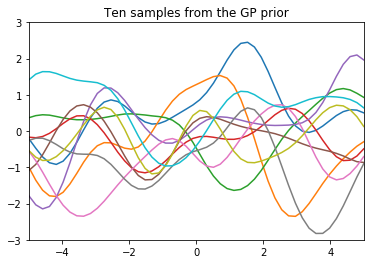

In [45]:
# Draw samples from the prior at our test points.
L = np.linalg.cholesky(K_ + 1e-6*np.eye(nTest))
f_prior = np.dot(L, np.random.normal(size=(nTest,10)))
plt.figure(1)
plt.clf()
plt.plot(Xtest, f_prior)
plt.title('Ten samples from the GP prior')
plt.axis([-5, 5, -3, 3])

[-5, 5, -3, 3]

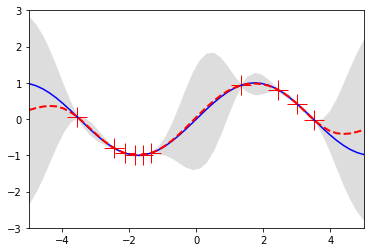

In [46]:
plt.figure(2)
plt.clf()
# Display the train points and the corresponding noisy function values as red plus signs
plt.plot(X, y, 'r+', ms=20)

# Display the test points and the corresponding function values as a smooth blue curve
plt.plot(Xtest, f(Xtest), 'b-')
plt.gca().fill_between(Xtest.flat, mu-3*s, mu+3*s, color="#dddddd")

# Plot the mean of our posterior prediction as a dashed red curve
plt.plot(Xtest, mu, 'r--', lw=2)
plt.axis([-5, 5, -3, 3])

[-5, 5, -3, 3]

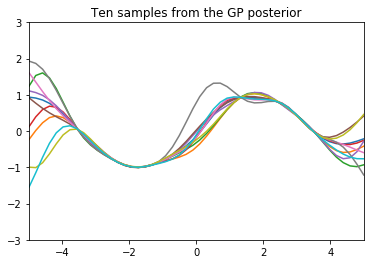

In [47]:
# Draw samples from the posterior at our test points
L = np.linalg.cholesky(K_ + 1e-6*np.eye(nTest) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(nTest,10)))
plt.figure(3)
plt.clf()
plt.plot(Xtest, f_post)
plt.title('Ten samples from the GP posterior')
plt.axis([-5, 5, -3, 3])